## Recolha de dados Financeiros: Stocks e Commodities**

### **Objetivo**
Coletar e analisar dados diários de preços de fechamento das **ações selecionadas tendo em conta o problema * e **15 commodities** para:
- Identificar relações estatísticas (cointegração).
- Agrupar ativos com comportamentos semelhantes (clustering).
- Testar estacionaridade das séries temporais.

---

### **Passos Realizados**
1. **Coleta de Dados**:
   - Uso da biblioteca `yfinance` para baixar dados diários (2020-2025).
2. **Limpeza dos Dados**:
   - Remoção de tickers inválidos ou deslistados.
3. **Próximos Passos**:
   - Análise de cointegração, clustering e testes de estacionaridade.

---

### **Ferramentas Utilizadas**
- Python com `yfinance`, `pandas`, `numpy`, `statsmodels`, `scipy` e `matplotlib`.

---

### **Exemplo de Dados**
| Date       | AAPL   | MSFT   | CL=F  | GC=F  |
|------------|--------|--------|-------|-------|
| 2020-01-02 | 72.00  | 150.00 | 61.00 | 1550.00|
| 2020-01-03 | 71.50  | 149.50 | 60.50 | 1545.00|

# 📜 Lista de Commodities e seus Tickers  

## ⚡ Energia  
- **CL=F** → Petróleo WTI (Crude Oil)  
- **BZ=F** → Petróleo Brent (Brent Crude Oil)  
- **NG=F** → Gás Natural (Natural Gas)  
- **RB=F** → Gasolina Reformulada (RBOB Gasoline)  
- **HO=F** → Óleo de Aquecimento (Heating Oil)  
- **QA=F** → Propano Mont Belvieu (Propane MB)  
- **QU=F** → Butano (Butane)  
- **QG=F** → Gás Natural Henry Hub (Natural Gas Henry Hub)  
- **QH=F** → Eletricidade PJM (PJM Electricity)  

## 🔩 Metais  
- **GC=F** → Ouro (Gold)  
- **SI=F** → Prata (Silver)  
- **HG=F** → Cobre (Copper)  
- **PL=F** → Platina (Platinum)  
- **PA=F** → Paládio (Palladium)  
- **ALI=F** → Alumínio (Aluminum - LME)  
- **LZS=F** → Zinco (Zinc - LME)  
- **LCO=F** → Níquel (Nickel - LME)  
- **LLO=F** → Chumbo (Lead - LME)  
- **FEF=F** → Minério de Ferro (Iron Ore - CME)  
- **MHC=F** → Cobre de Xangai (Shanghai Copper - SHFE)  
- **MAL=F** → Alumínio de Xangai (Shanghai Aluminum - SHFE)  

## 🌾 Grãos e Oleaginosas  
- **ZS=F** → Soja (Soybeans)  
- **ZM=F** → Farelo de Soja (Soybean Meal)  
- **ZL=F** → Óleo de Soja (Soybean Oil)  
- **ZW=F** → Trigo Chicago (Wheat - CBOT)  
- **KE=F** → Trigo Kansas (Hard Red Wheat - KCBT)  
- **MW=F** → Trigo Primavera (Spring Wheat - MGEX)  
- **ZC=F** → Milho (Corn)  
- **ZO=F** → Aveia (Oats)  
- **ZR=F** → Arroz (Rough Rice)  
- **RS=F** → Canola (Rapeseed)  
- **BO=F** → Óleo de Palma (Palm Oil - Bursa Malaysia)  
- **SM=F** → Farelo de Palma (Palm Kernel Meal)  

## 🌱 Soft Commodities (Agrícolas)  
- **CC=F** → Cacau (Cocoa)  
- **CJ=F** → Cacau de Londres (London Cocoa)  
- **CT=F** → Algodão (Cotton)  
- **SB=F** → Açúcar nº 11 (Sugar No.11)  
- **YO=F** → Açúcar nº 16 (Sugar No.16)  
- **KC=F** → Café Arábica (Coffee - Arabica ICE)  
- **DF=F** → Café Robusta (Coffee - Robusta ICE)  
- **OJ=F** → Suco de Laranja (Orange Juice)  
- **CO=F** → Óleo de Coco (Coconut Oil)  
- **TU=F** → Borracha Natural (Rubber - TOCOM)  

## 🐄 Pecuária e Carnes  
- **LE=F** → Gado Vivo (Live Cattle)  
- **GF=F** → Bezerros de Engorda (Feeder Cattle)  
- **HE=F** → Suínos Magros (Lean Hogs)  
- **DA=F** → Leite Classe III (Class III Milk)  
- **DC=F** → Leite Classe IV (Class IV Milk)  
- **LB=F** → Madeira Serrada (Lumber - CME)  


In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from itertools import product

# Configuração para evitar warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:


# 1. Lista Atualizada de Tickers (S&P 500 + Commodities) - APENAS OS QUE FUNCIONARAM
stock_tickers = [
    # Energia (Petróleo & Gás)
    'XOM', 'CVX', 'SHEL', 'BP', 'TTE', 'COP', 'OXY', 'PBR', 'VLO', 'PSX', 'MPC', 'EOG',
    'HES', 'DVN', 'KMI', 'WMB', 'LNG', 'EQT', 'APA', 'HAL', 'SLB', 'BKR',

    # Metais & Mineração
    'NEM', 'GOLD', 'AEM', 'FNV', 'WPM', 'PAAS', 'AG', 'HL', 'FCX', 'SCCO', 'AA', 'RIO',
    'BHP', 'VALE', 'GLNCY', 'LAC', 'MP', 'SBSW', 'TECK', 'CLF', 'X', 'NUE',

    # Agronegócio & Alimentos (removido HRL que falhou)
    'ADM', 'BG', 'DE', 'NTR', 'TSN', 'SJM', 'CAG', 'GIS', 'K', 'HSY', 'MDLZ',
    'BYND', 'DAR', 'INGR', 'CALM',

    # Tecnologia (removido UBER que falhou)
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'AMD', 'AVGO', 'QCOM',
    'TXN', 'ADBE', 'CRM', 'ORCL', 'IBM', 'CSCO', 'NOW', 'SHOP', 'PYPL',

    # Bens Industriais
    'CAT', 'BA', 'MMM', 'HON', 'GE', 'LMT', 'RTX', 'GD', 'NOC', 'EMR', 'ITW', 'FAST',
    'DOV', 'ETN', 'PH', 'AME', 'ROK', 'SWK',

    # Varejo & Consumo (removido RIVN que falhou)
    'WMT', 'TGT', 'COST', 'HD', 'LOW', 'SBUX', 'MCD', 'YUM', 'DPZ', 'CMG', 'NKE',
    'ULTA', 'BBY', 'DG', 'DLTR', 'F', 'GM',

    # Saúde & Biotech
    'JNJ', 'PFE', 'MRK', 'ABT', 'AMGN', 'GILD', 'BMY', 'UNH', 'LLY', 'REGN', 'VRTX',
    'CVS', 'WBA', 'DHR', 'SYK', 'MDT', 'ISRG', 'ZTS',

    # Financeiro
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'V', 'MA',

    # Utilities e Serviços
    'NEE', 'DUK', 'SO', 'D', 'AEP', 'EXC', 'SRE', 'WEC', 'AWK', 'ECL', 'RSG', 'WM',
    'HUM', 'T', 'VZ', 'TMUS', 'CHTR', 'CMCSA'
]

# Commodities que funcionaram
commodity_tickers = [
    # Energia
    'CL=F', 'BZ=F', 'NG=F', 'RB=F', 'HO=F', 'QA=F', 'QU=F', 'QG=F', 'QH=F',

    # Metais
    'GC=F', 'SI=F', 'HG=F', 'PL=F', 'PA=F', 'ALI=F',

    # Grãos e Oleaginosas
    'ZS=F', 'ZM=F', 'ZL=F', 'ZW=F', 'ZC=F', 'ZO=F', 'ZR=F', 'KE=F',
    'BO=F', 'SM=F', 'RR=F',

    # Soft Commodities
    'CC=F', 'CJ=F', 'SB=F', 'YO=F', 'KC=F', 'OJ=F',

    # Pecuária e Carnes
    'LE=F', 'GF=F', 'HE=F', 'DA=F', 'DC=F', 'LB=F', 'FC=F', 'LH=F',

    # Químicos
    'HY=F'
]

all_tickers = stock_tickers + commodity_tickers

# 2. Função para Download de Dados (MESMA ESTRUTURA ORIGINAL)
def download_data(tickers, start_date, end_date):
    """
    Baixa dados do Yahoo Finance com tratamento robusto de erros
    """
    try:
        print(f"Baixando {len(tickers)} ativos...")
        data = yf.download(
            tickers,
            start=start_date,
            end=end_date,
            progress=False,
            group_by='ticker',
            threads=True
        )

        if len(tickers) > 1:
            closes = pd.DataFrame({t: data[t]['Close'] for t in tickers if t in data})
        else:
            closes = pd.DataFrame(data['Close'])
            closes.columns = tickers

        return closes.dropna(how='all', axis=1)

    except Exception as e:
        print(f"Erro no download em massa: {e}")
        return pd.DataFrame()

# 3. Download dos Dados
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

print("Baixando dados dos tickers validados...")
data = download_data(all_tickers, start_date, end_date)

# 4. Verificação Final
print("\nResumo Final:")
print(f"- Total de tickers solicitados: {len(all_tickers)}")
print(f"- Tickers com dados obtidos: {len(data.columns)}")
print(f"- Tickers sem dados: {len(set(all_tickers) - set(data.columns))}")

# 5. Salvando os Dados (MESMO NOME DO ARQUIVO ORIGINAL)
data.to_csv('stocks_commodities_data.csv')
print("\nDados salvos em 'stocks_commodities_data.csv'")

# Mostrar amostra
print("\nAmostra dos dados:")
print(data.iloc[:3, :5])

Baixando dados dos tickers validados...
Baixando 202 ativos...

Resumo Final:
- Total de tickers solicitados: 202
- Tickers com dados obtidos: 202
- Tickers sem dados: 0

Dados salvos em 'stocks_commodities_data.csv'

Amostra dos dados:
                  XOM        CVX       SHEL         BP        TTE
Date                                                             
2020-01-02  55.137970  96.158691  48.650612  28.746147  39.543098
2020-01-03  54.694706  95.826103  49.033367  29.266205  39.686180
2020-01-06  55.114643  95.501442  49.644146  30.034977  40.430256


Dados carregados com sucesso. Shape: (1325, 202)

Pré-processando dados...

Separando stocks e commodities...

Calculando correlações rolling...

Criando visualizações...


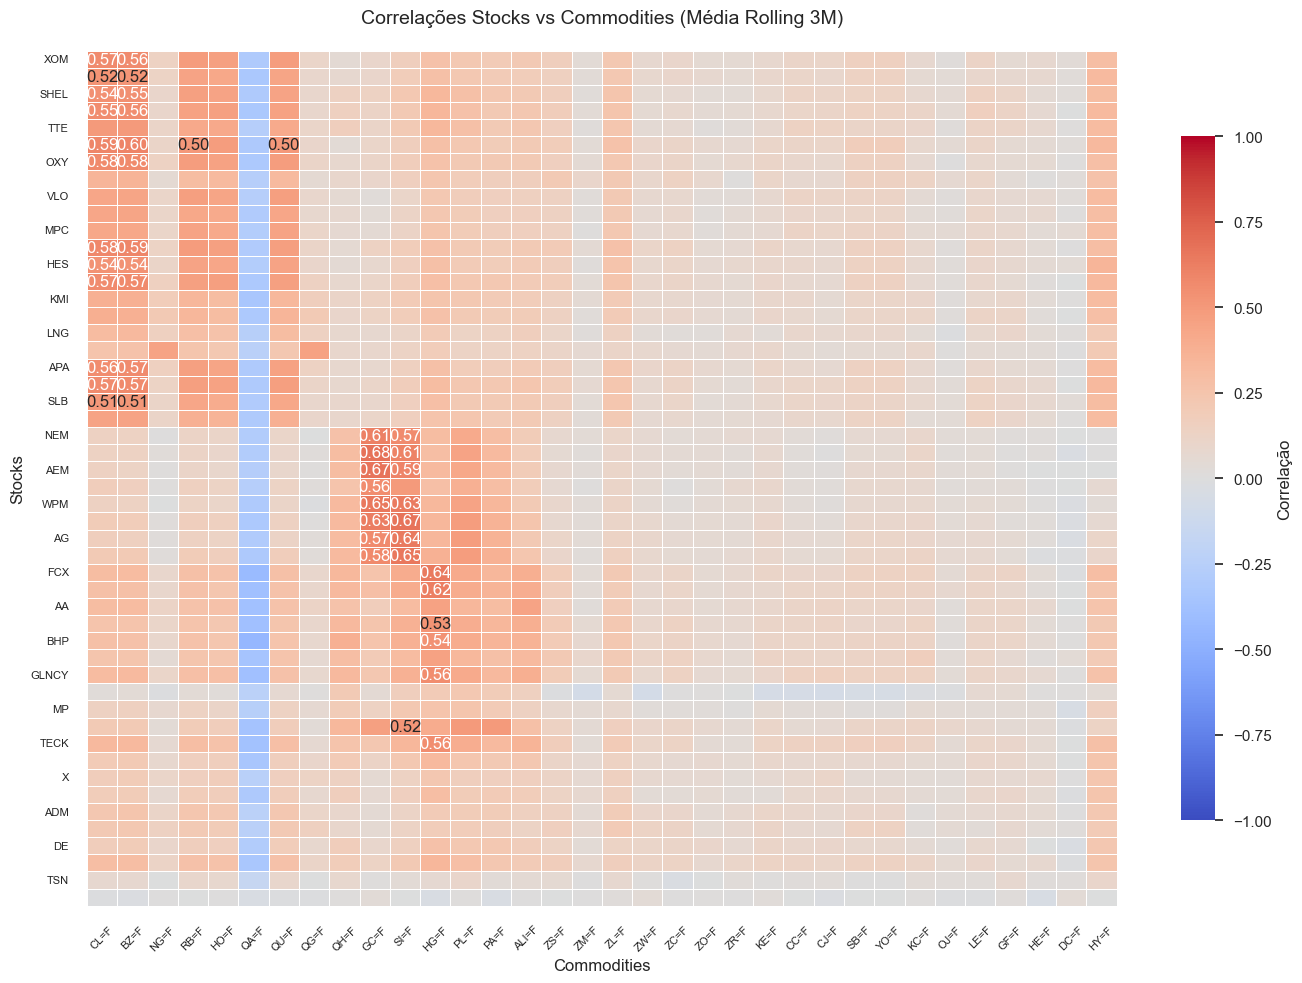


Top 30 pares mais correlacionados:
GOLD  GC=F    0.679191
PAAS  SI=F    0.669964
AEM   GC=F    0.667632
WPM   GC=F    0.653949
HL    SI=F    0.649655
FCX   HG=F    0.644034
AG    SI=F    0.643033
WPM   SI=F    0.634308
PAAS  GC=F    0.631233
SCCO  HG=F    0.623305
NEM   GC=F    0.612027
GOLD  SI=F    0.608193
COP   BZ=F    0.596809
AEM   SI=F    0.594392
COP   CL=F    0.592133
EOG   BZ=F    0.587316
      CL=F    0.579501
OXY   BZ=F    0.578087
HL    GC=F    0.577377
OXY   CL=F    0.575308
HAL   BZ=F    0.573804
DVN   BZ=F    0.573137
XOM   CL=F    0.570176
HAL   CL=F    0.570101
DVN   CL=F    0.569103
AG    GC=F    0.567946
NEM   SI=F    0.567829
APA   BZ=F    0.567620
XOM   BZ=F    0.564912
TECK  HG=F    0.562020

Salvando resultados...

Análise concluída com sucesso!
Melhor par: ('GOLD', 'GC=F') com correlação 0.679


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Configurações iniciais (mantidas conforme seu original)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", rc={'figure.figsize':(12,8)})

# 1. Carregar os dados salvos (mantido igual)
try:
    data = pd.read_csv('stocks_commodities_data.csv', index_col=0, parse_dates=True)
    print("Dados carregados com sucesso. Shape:", data.shape)
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho ou execute o código de download primeiro.")
    exit()

# 2. Pré-processamento dos dados (mantido igual)
print("\nPré-processando dados...")
data_cleaned = data.ffill().bfill()
returns = np.log(data_cleaned/data_cleaned.shift(1)).dropna()

# 3. Separar stocks e commodities (mantido igual)
print("\nSeparando stocks e commodities...")
commodity_cols = [col for col in returns.columns if '=F' in col]
stock_cols = [col for col in returns.columns if '=F' not in col]

# 4. Matriz de Correlação Rolling (mantido igual)
print("\nCalculando correlações rolling...")

def calculate_rolling_correlations(stocks, commodities, window=63):
    corr_matrix = pd.DataFrame(index=stocks, columns=commodities)

    for stock in stocks:
        for commodity in commodities:
            try:
                rolling_corr = returns[stock].rolling(window).corr(returns[commodity])
                mean_corr = float(rolling_corr.mean())
                corr_matrix.loc[stock, commodity] = mean_corr
            except Exception as e:
                corr_matrix.loc[stock, commodity] = np.nan

    return corr_matrix.dropna(how='all').dropna(axis=1, how='all')

# Calcular para um subconjunto (mantido igual)
sample_stocks = stock_cols[:50]
rolling_corr_matrix = calculate_rolling_correlations(sample_stocks, commodity_cols)
rolling_corr_matrix = rolling_corr_matrix.astype(float)

# 5. Visualização dos Resultados (MODIFICADO APENAS ESTA PARTE)
print("\nCriando visualizações...")

plt.figure(figsize=(14, 10))
try:
    # Criar matriz de anotações: números apenas onde correlação > 0.5
    annotations = rolling_corr_matrix.applymap(lambda x: f"{x:.2f}" if x > 0.5 else "")

    heatmap = sns.heatmap(
        rolling_corr_matrix,
        cmap='coolwarm',
        center=0,
        vmin=-1,
        vmax=1,
        annot=annotations,
        fmt="",
        linewidths=.5,
        cbar_kws={'label': 'Correlação', 'shrink': 0.8}
    )
    plt.title('Correlações Stocks vs Commodities (Média Rolling 3M)', pad=20, fontsize=14)
    plt.xlabel('Commodities', fontsize=12)
    plt.ylabel('Stocks', fontsize=12)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.savefig('correlations_heatmap.png', bbox_inches='tight', dpi=300)
    plt.show()
except Exception as e:
    print(f"Erro ao criar heatmap: {e}")

# 6. Análise dos Melhores Pares (mantido igual)
print("\nTop 30 pares mais correlacionados:")
top_pairs = rolling_corr_matrix.stack().sort_values(key=abs, ascending=False).head(30)
print(top_pairs.to_string())

# 7. Salvar Resultados (mantido igual)
print("\nSalvando resultados...")
rolling_corr_matrix.to_csv('rolling_correlations.csv')
top_pairs.to_csv('top_correlated_pairs.csv')

print("\nAnálise concluída com sucesso!")
print(f"Melhor par: {top_pairs.index[0]} com correlação {top_pairs.iloc[0]:.3f}")

dbscan

Aumentar o valor de min_samples — Isso exige mais ativos para formar um cluster, reduzindo a quantidade de clusters pequenos.

Diminuir o valor de eps — Isso torna o critério de agrupamento mais rigoroso, formando menos clusters.

Filtrar por correlação mínima — Definir um limite mínimo de correlação (por exemplo, corr > 0.7) antes de aplicar o DBSCAN.

Remover redundância nos pares — Eliminar pares duplicados e manter apenas uma direção (exemplo: (A, B) e não (B, A)).


Iniciando análise DBSCAN aprimorada

1. Carregando dados...
   Dados brutos: 202 ativos, 1325 dias

2. Limpando e preparando dados...
   Dados após limpeza: 194 ativos, 1325 dias
   Analisando 160 stocks e 34 commodities

3. Calculando retornos e extraindo features...
   Features extraídas com sucesso. Dimensões: (194, 5)
   Variância explicada: 98.69%
   Contribuição por componente: [0.38965436 0.21916275 0.16011454 0.12359041 0.09437577]

4. Buscando parâmetros ideais com métricas de qualidade...

Testando: eps=0.6, min_samples=2
  Clusters: 22, Outliers: 99, Silhueta: 0.272
  Cluster 0: 32 stocks, 1 commodities, equilíbrio: 0.03
  Cluster 6: 1 stocks, 1 commodities, equilíbrio: 1.00
  Cluster 11: 2 stocks, 1 commodities, equilíbrio: 0.50
  Pontuação de qualidade: 0.209

Testando: eps=0.6, min_samples=3
  Clusters: 6, Outliers: 131, Silhueta: 0.295
  Cluster 0: 32 stocks, 1 commodities, equilíbrio: 0.03
  Cluster 3: 2 stocks, 1 commodities, equilíbrio: 0.50
  Pontuação de qualidade:

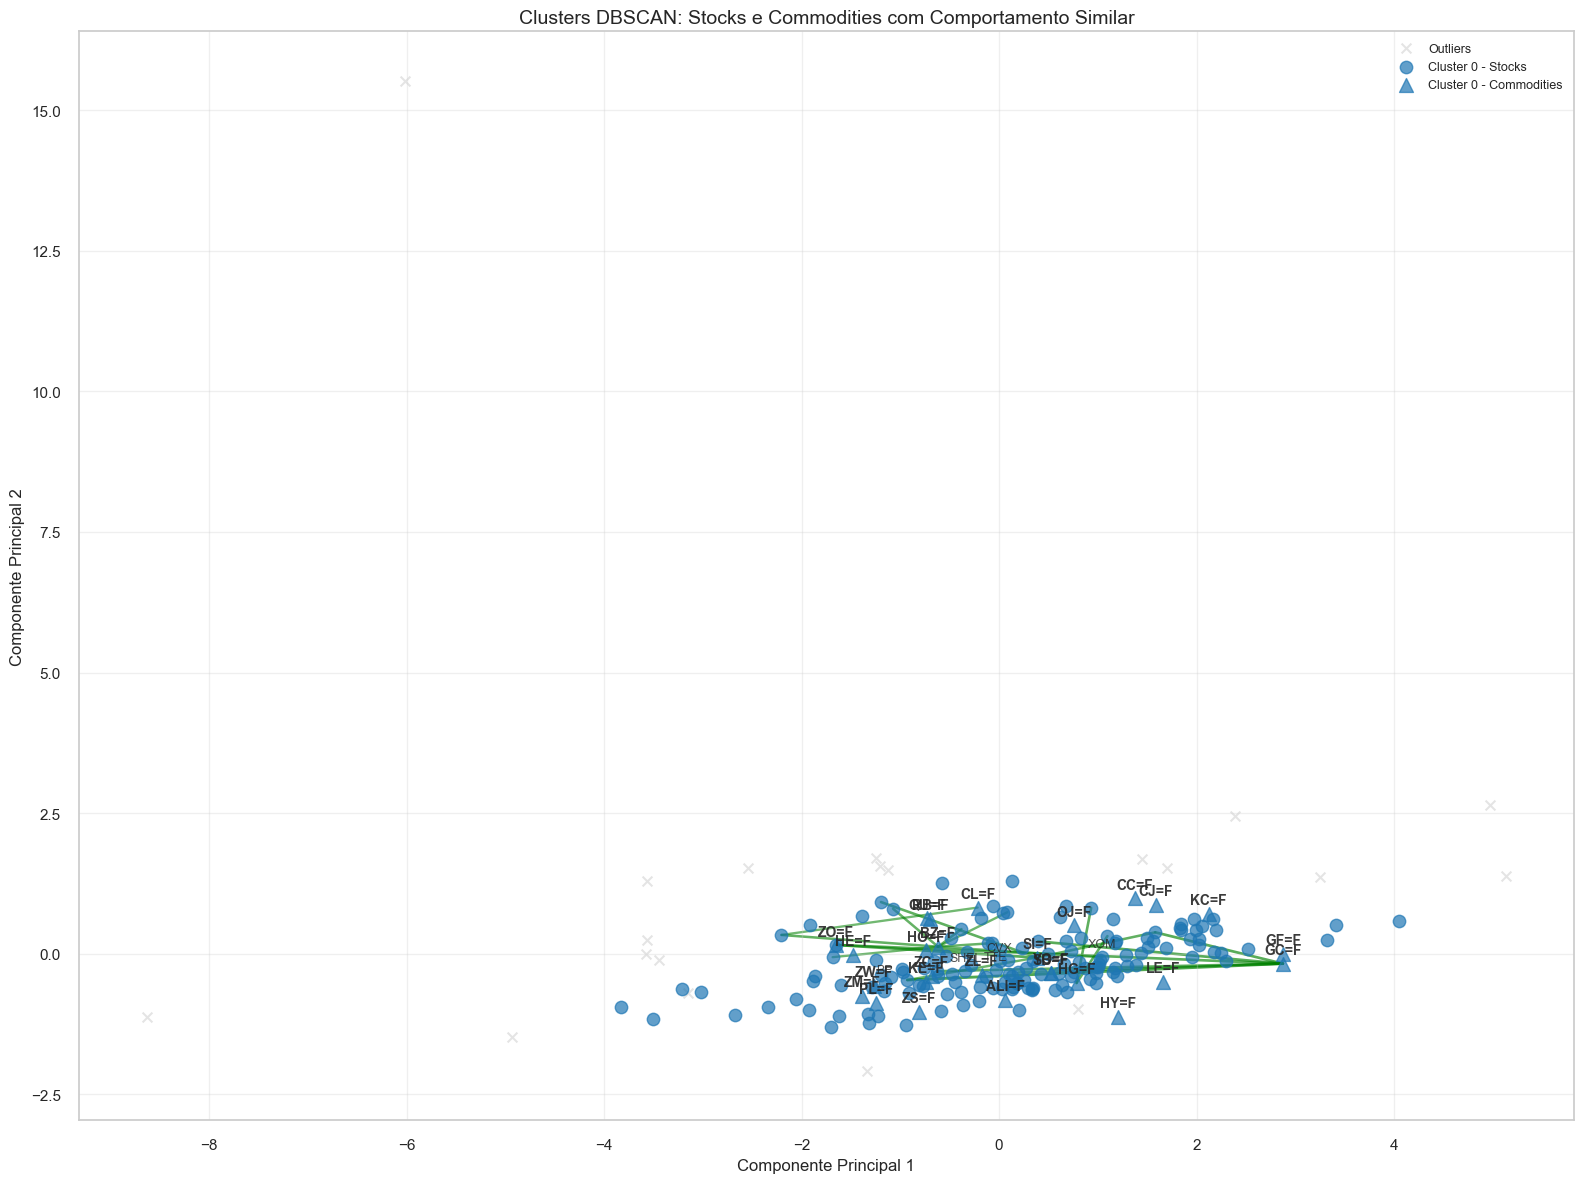

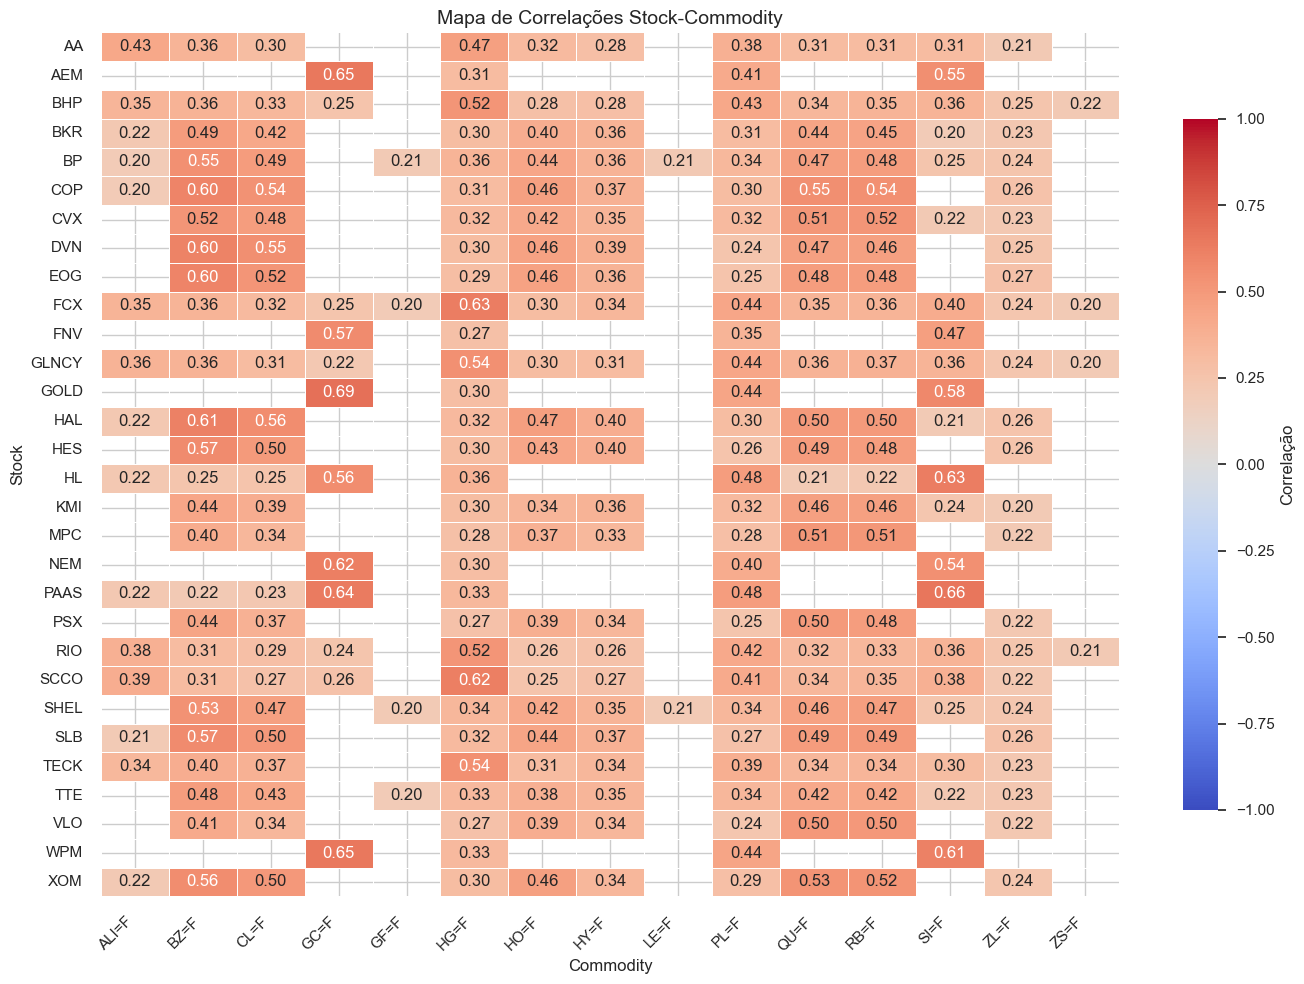

In [27]:
# Imports necessários para o DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from itertools import product
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from collections import Counter
from sklearn.metrics import silhouette_score


# 1. Nova função de limpeza de dados que preserva mais ativos
def clean_financial_data(data, min_valid_percentage=0.9):
    """
    Limpa dados financeiros mantendo ativos com um mínimo de valores válidos
    e preenchendo os valores ausentes de forma adequada.
    """
    # Calcular a porcentagem de valores válidos para cada coluna
    valid_percentage = data.count() / len(data)

    # Selecionar colunas com pelo menos min_valid_percentage de dados válidos
    columns_to_keep = valid_percentage[valid_percentage >= min_valid_percentage].index.tolist()

    if len(columns_to_keep) < 3:
        print(f"Aviso: Muito poucos ativos com {min_valid_percentage*100}% de dados válidos.")
        print(f"Reduzindo requisito de completude para manter mais ativos...")

        # Reduzir progressivamente o requisito para manter pelo menos alguns ativos
        for threshold in [0.8, 0.7, 0.6, 0.5]:
            columns_to_keep = valid_percentage[valid_percentage >= threshold].index.tolist()
            if len(columns_to_keep) >= 10:  # Pelo menos 10 ativos
                print(f"Usando limite de {threshold*100}% de dados válidos.")
                print(f"Mantendo {len(columns_to_keep)} ativos.")
                break

    # Filtrar o DataFrame
    filtered_data = data[columns_to_keep]

    # Preencher valores ausentes
    # Primeiro com o método forward fill (propaga o último valor válido)
    filled_data = filtered_data.ffill()
    # Depois com o método backward fill (para o início das séries)
    filled_data = filled_data.bfill()

    return filled_data

def improved_run_pipeline(stocks, commodities, eps_range=None, min_samples_range=None, pca_components=5):
    """
    Pipeline melhorado para identificação de pares stock-commodity com métricas
    de qualidade e análise mais detalhada dos clusters
    """
    print(f"\n{'='*60}")
    print(f"Iniciando análise DBSCAN aprimorada")
    print(f"{'='*60}")

    # 1. Carregamento e limpeza de dados (mantido como está)
    print("\n1. Carregando dados...")
    data = download_data(stocks + commodities, start_date, end_date)
    print(f"   Dados brutos: {data.shape[1]} ativos, {data.shape[0]} dias")

    print("\n2. Limpando e preparando dados...")
    cleaned_data = clean_financial_data(data, min_valid_percentage=0.7)
    print(f"   Dados após limpeza: {cleaned_data.shape[1]} ativos, {cleaned_data.shape[0]} dias")

    valid_stocks = [t for t in stocks if t in cleaned_data.columns]
    valid_commodities = [t for t in commodities if t in cleaned_data.columns]
    print(f"   Analisando {len(valid_stocks)} stocks e {len(valid_commodities)} commodities")

    # 2. Cálculo de retornos e extração de features (ampliado)
    print("\n3. Calculando retornos e extraindo features...")
    returns = np.log(cleaned_data / cleaned_data.shift(1)).dropna()

    # Calcular matriz de correlação para uso posterior
    corr_matrix = returns.corr()

    # Extração de features mais robusta
    features_list = []
    tickers = []

    for ticker in returns.columns:
        series = returns[ticker]
        if series.isna().sum() / len(series) > 0.2:
            continue

        series = series.fillna(method='ffill').fillna(method='bfill').fillna(0)

        # Features expandidas
        try:
            # Métricas de retorno
            mean_return = series.mean()
            volatility = series.std()

            # Métricas de risco
            sharpe = mean_return / volatility if volatility > 0 else 0
            downside_vol = series[series < 0].std() if len(series[series < 0]) > 0 else 0
            sortino = mean_return / downside_vol if downside_vol > 0 else 0

            # Métricas de forma da distribuição
            skewness = series.skew()
            kurtosis = series.kurt()

            # Métricas de cauda
            var_95 = np.percentile(series, 5)
            cvar_95 = series[series <= var_95].mean() if len(series[series <= var_95]) > 0 else var_95

            # Correlações com mercado (proxy)
            market_corr = np.corrcoef(series.values, returns.mean(axis=1).values)[0, 1]

            features = [
                mean_return * 252,  # Anualizado
                volatility * np.sqrt(252),  # Anualizado
                sharpe * np.sqrt(252),  # Anualizado
                skewness,
                kurtosis,
                var_95 * np.sqrt(252),  # Anualizado
                market_corr,
                sortino * np.sqrt(252)  # Anualizado
            ]

            features_list.append(features)
            tickers.append(ticker)
        except Exception as e:
            print(f"Erro ao processar {ticker}: {e}")

    # 3. Preparação para clustering
    features_array = np.array(features_list)

    # Escalar features para garantir peso igual
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_array)

    # Reduzir dimensionalidade
    pca = PCA(n_components=min(pca_components, features_scaled.shape[0], features_scaled.shape[1]))
    features_pca = pca.fit_transform(features_scaled)

    print(f"   Features extraídas com sucesso. Dimensões: {features_pca.shape}")
    print(f"   Variância explicada: {pca.explained_variance_ratio_.sum():.2%}")
    print(f"   Contribuição por componente: {pca.explained_variance_ratio_}")

    # 4. Definir grids de parâmetros mais abrangentes se não fornecidos
    if eps_range is None:
        eps_range = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.8, 2.0, 2.5, 3.0]

    if min_samples_range is None:
        min_samples_range = [2, 3, 4, 5]

    # 5. Busca de parâmetros com métricas de qualidade
    print("\n4. Buscando parâmetros ideais com métricas de qualidade...")

    results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            print(f"\nTestando: eps={eps}, min_samples={min_samples}")

            # Executar DBSCAN
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(features_pca)

            # Métricas básicas
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)

            # Pular se não houver clusters formados
            if n_clusters == 0:
                print(f"  Nenhum cluster formado. Pulando...")
                continue

            # Calcular silhueta se houver mais de um cluster
            if n_clusters > 1:
                # Excluir outliers para o cálculo da silhueta
                mask = labels != -1
                if sum(mask) > n_clusters:  # Precisa de mais amostras que clusters
                    silhouette = silhouette_score(features_pca[mask], labels[mask])
                else:
                    silhouette = 0
            else:
                silhouette = 0

            print(f"  Clusters: {n_clusters}, Outliers: {n_noise}, Silhueta: {silhouette:.3f}")

            # Criar DataFrame com informações de cluster
            cluster_df = pd.DataFrame({
                'Ticker': tickers,
                'Label': labels,
                'Type': ['Stock' if t in valid_stocks else 'Commodity' for t in tickers]
            })

            # Avaliar equilíbrio de clusters e pares relevantes
            cluster_stats = {}
            balanced_clusters = 0
            total_pairs = 0
            strong_pairs = 0  # Pares com correlação significativa

            for label in sorted(set(labels)):
                if label == -1:  # Pular outliers
                    continue

                group = cluster_df[cluster_df['Label'] == label]
                cluster_stocks = group[group['Type'] == 'Stock']['Ticker'].tolist()
                cluster_commodities = group[group['Type'] == 'Commodity']['Ticker'].tolist()

                n_stocks = len(cluster_stocks)
                n_commodities = len(cluster_commodities)

                # Calcular equilíbrio como min(stocks, commodities) / max(stocks, commodities)
                balance_ratio = min(n_stocks, n_commodities) / max(n_stocks, n_commodities) if max(n_stocks, n_commodities) > 0 else 0

                # Verificar se é um cluster misto
                is_mixed = n_stocks > 0 and n_commodities > 0

                if is_mixed:
                    balanced_clusters += balance_ratio
                    n_pairs = n_stocks * n_commodities
                    total_pairs += n_pairs

                    # Verificar correlações dos pares
                    for stock, commodity in product(cluster_stocks, cluster_commodities):
                        if stock in corr_matrix.index and commodity in corr_matrix.columns:
                            corr = corr_matrix.loc[stock, commodity]
                            if abs(corr) > 0.3:  # Limiar arbitrário para correlação significativa
                                strong_pairs += 1

                cluster_stats[label] = {
                    'stocks': n_stocks,
                    'commodities': n_commodities,
                    'balance': balance_ratio,
                    'is_mixed': is_mixed
                }

                if is_mixed:
                    print(f"  Cluster {label}: {n_stocks} stocks, {n_commodities} commodities, equilíbrio: {balance_ratio:.2f}")

            # Calcular métricas gerais
            avg_balance = balanced_clusters / n_clusters if n_clusters > 0 else 0
            strong_pair_ratio = strong_pairs / total_pairs if total_pairs > 0 else 0

            # Pontuação geral que favorece equilíbrio e correlações
            if total_pairs > 0:
                quality_score = (0.4 * avg_balance + 0.3 * strong_pair_ratio + 0.3 * (1 - n_noise/len(tickers)))
            else:
                quality_score = 0

            # Armazenar resultados
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': silhouette,
                'pairs': total_pairs,
                'strong_pairs': strong_pairs,
                'avg_balance': avg_balance,
                'quality_score': quality_score,
                'labels': labels,
                'cluster_stats': cluster_stats
            })

            print(f"  Pontuação de qualidade: {quality_score:.3f}")

    # 6. Selecionar melhor configuração
    if results:
        # Ordenar por pontuação de qualidade
        results.sort(key=lambda x: x['quality_score'], reverse=True)
        best_result = results[0]

        print("\n5. Melhores parâmetros encontrados:")
        print(f"   eps={best_result['eps']}, min_samples={best_result['min_samples']}")
        print(f"   Clusters: {best_result['n_clusters']}, Outliers: {best_result['n_noise']}")
        print(f"   Silhueta: {best_result['silhouette']:.3f}, Pares: {best_result['pairs']}")
        print(f"   Pontuação de qualidade: {best_result['quality_score']:.3f}")

        # Usar os melhores parâmetros
        best_labels = best_result['labels']

        # 7. Análise aprofundada dos melhores clusters
        print("\n6. Analisando clusters em detalhes:")

        cluster_df = pd.DataFrame({
            'Ticker': tickers,
            'Label': best_labels,
            'Type': ['Stock' if t in valid_stocks else 'Commodity' for t in tickers]
        })

        # Criar pares e análise de correlação
        pairs = []

        for label in sorted(set(best_labels)):
            if label == -1:  # Pular outliers
                continue

            group = cluster_df[cluster_df['Label'] == label]
            cluster_stocks = group[group['Type'] == 'Stock']['Ticker'].tolist()
            cluster_commodities = group[group['Type'] == 'Commodity']['Ticker'].tolist()

            if cluster_stocks and cluster_commodities:
                stats = best_result['cluster_stats'][label]
                print(f"\n  Cluster {label}:")
                print(f"    {len(cluster_stocks)} stocks: {', '.join(cluster_stocks[:5])}" +
                      (f" + {len(cluster_stocks)-5} mais" if len(cluster_stocks) > 5 else ""))
                print(f"    {len(cluster_commodities)} commodities: {', '.join(cluster_commodities)}")
                print(f"    Equilíbrio: {stats['balance']:.2f}")

                # Analisar correlações dentro do cluster
                correlations = []

                for stock in cluster_stocks:
                    for commodity in cluster_commodities:
                        if stock in returns.columns and commodity in returns.columns:
                            # Calcular correlação diretamente dos retornos
                            stock_returns = returns[stock].values
                            commodity_returns = returns[commodity].values
                            valid_idx = ~(np.isnan(stock_returns) | np.isnan(commodity_returns))

                            if sum(valid_idx) > 30:  # Mínimo de 30 observações
                                corr, p_value = pearsonr(stock_returns[valid_idx], commodity_returns[valid_idx])
                                is_significant = p_value < 0.05

                                pair_info = {
                                    'Stock': stock,
                                    'Commodity': commodity,
                                    'Cluster': label,
                                    'Correlation': corr,
                                    'P_Value': p_value,
                                    'Significant': is_significant
                                }

                                pairs.append(pair_info)
                                correlations.append(corr)

                if correlations:
                    mean_corr = np.mean(correlations)
                    median_corr = np.median(correlations)
                    significant_count = sum(p['Significant'] for p in pairs if p['Cluster'] == label)
                    significant_ratio = significant_count / len(correlations)

                    print(f"    Correlação média: {mean_corr:.3f}, mediana: {median_corr:.3f}")
                    print(f"    {significant_count}/{len(correlations)} correlações significativas ({significant_ratio:.1%})")

        # 8. Criar e salvar dataframe de pares
        pairs_df = pd.DataFrame(pairs)

        if len(pairs_df) > 0:
            # Ordenar por correlação absoluta
            pairs_df['Abs_Corr'] = pairs_df['Correlation'].abs()
            pairs_df = pairs_df.sort_values('Abs_Corr', ascending=False)

            # Mostrar distribuição de correlações
            corr_distribution = Counter()
            for c in pairs_df['Correlation']:
                bin_key = round(c * 2) / 2  # Arredondar para 0.5 mais próximo
                corr_distribution[bin_key] += 1

            print("\n7. Distribuição de correlações:")
            for k in sorted(corr_distribution.keys()):
                print(f"   {k:.1f}: {corr_distribution[k]} pares")

            # Salvar resultados
            pairs_df.to_csv('stock_commodity_pairs_improved.csv', index=False)
            print(f"\nResultados salvos em 'stock_commodity_pairs_improved.csv'")

            # Mostrar os melhores pares
            print("\nTop 10 pares por correlação absoluta:")
            top_pairs = pairs_df.head(min(10, len(pairs_df)))
            for _, row in top_pairs.iterrows():
                print(f"  {row['Stock']} - {row['Commodity']}: corr = {row['Correlation']:.3f}" +
                      (", significativa" if row['Significant'] else ""))

            # 9. Visualizar clusters melhorados
            plot_improved_clusters(features_pca, best_labels, tickers,
                                  cluster_df['Type'].tolist(), pairs_df)

            return pairs_df, cluster_df

    print("\nNenhum par stock-commodity relevante encontrado.")
    return pd.DataFrame(), pd.DataFrame()

def plot_improved_clusters(features, labels, tickers, types, pairs_df=None):
    """
    Visualização aprimorada dos clusters com informação sobre correlações
    """
    # Reduzir para 2D para visualização
    pca_2d = PCA(n_components=2)
    coords = pca_2d.fit_transform(features)

    plt.figure(figsize=(16, 12))

    # Configurar cores para clusters e marcadores para tipos
    unique_labels = sorted(set(labels))
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    colors = plt.cm.tab10(np.linspace(0, 1, max(n_clusters, 1)))

    # Plotar outliers primeiro
    if -1 in unique_labels:
        outlier_idx = np.where(labels == -1)[0]
        plt.scatter(
            coords[outlier_idx, 0],
            coords[outlier_idx, 1],
            s=50,
            c='lightgrey',
            marker='x',
            label='Outliers',
            alpha=0.6
        )

    # Plotar clusters
    stock_markers = {}  # Dicionário para acompanhar os marcadores já plotados

    for i, label in enumerate([l for l in unique_labels if l != -1]):
        cluster_idx = np.where(labels == label)[0]

        # Separar stocks e commodities no mesmo cluster
        stock_idx = [idx for idx in cluster_idx if types[idx] == 'Stock']
        commodity_idx = [idx for idx in cluster_idx if types[idx] == 'Commodity']

        # Plotar stocks (círculos)
        if stock_idx:
            plt.scatter(
                coords[stock_idx, 0],
                coords[stock_idx, 1],
                s=80,
                c=[colors[i]],
                marker='o',
                label=f'Cluster {label} - Stocks',
                alpha=0.7
            )

            # Registrar stocks plotados
            for idx in stock_idx:
                stock_markers[tickers[idx]] = (coords[idx, 0], coords[idx, 1])

        # Plotar commodities (triângulos)
        if commodity_idx:
            plt.scatter(
                coords[commodity_idx, 0],
                coords[commodity_idx, 1],
                s=100,
                c=[colors[i]],
                marker='^',
                label=f'Cluster {label} - Commodities',
                alpha=0.7
            )

        # Adicionar rótulos para todas as commodities
        for idx in commodity_idx:
            plt.annotate(
                tickers[idx],
                (coords[idx, 0], coords[idx, 1]),
                fontsize=10,
                fontweight='bold',
                alpha=0.9,
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points'
            )

        # Adicionar rótulos para alguns stocks (para não sobrecarregar o gráfico)
        for idx in stock_idx[:min(5, len(stock_idx))]:
            plt.annotate(
                tickers[idx],
                (coords[idx, 0], coords[idx, 1]),
                fontsize=9,
                alpha=0.8,
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points'
            )

    # Se temos informações de pares, mostrar linhas de conexão para os top pares
    if pairs_df is not None and not pairs_df.empty:
        # Ordenar por correlação absoluta e pegar os top pares
        top_n = min(20, len(pairs_df))
        top_pairs = pairs_df.nlargest(top_n, 'Abs_Corr')

        # Estabelecer mapeamento ticker -> coordenadas
        ticker_coords = {}
        for i, ticker in enumerate(tickers):
            ticker_coords[ticker] = (coords[i, 0], coords[i, 1])

        # Plotar linhas conectando pares com cores baseadas na correlação
        for _, row in top_pairs.iterrows():
            stock = row['Stock']
            commodity = row['Commodity']
            corr = row['Correlation']

            if stock in ticker_coords and commodity in ticker_coords:
                x1, y1 = ticker_coords[stock]
                x2, y2 = ticker_coords[commodity]

                # Cor baseada na correlação (vermelho para negativa, verde para positiva)
                color = 'green' if corr > 0 else 'red'
                alpha = min(0.9, max(0.3, abs(corr)))  # Alpha baseado na magnitude
                linewidth = min(3, max(1, abs(corr) * 3))  # Espessura baseada na magnitude

                plt.plot([x1, x2], [y1, y2], color=color, alpha=alpha,
                         linewidth=linewidth, linestyle='-', zorder=0)

    plt.title('Clusters DBSCAN: Stocks e Commodities com Comportamento Similar', fontsize=14)
    plt.xlabel('Componente Principal 1', fontsize=12)
    plt.ylabel('Componente Principal 2', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Criar legenda personalizada sem duplicações
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='best', fontsize=9)

    plt.tight_layout()
    plt.savefig('dbscan_improved_clusters.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Criar um segundo gráfico - mapa de calor das correlações por cluster
    if pairs_df is not None and not pairs_df.empty:
        # Criar um mapa de calor para visualizar as correlações médias entre clusters
        cluster_corr = pd.pivot_table(
            pairs_df,
            values='Correlation',
            index='Stock',
            columns='Commodity',
            aggfunc='mean'
        ).fillna(0)

        # Limitar a um número razoável para visualização
        if cluster_corr.shape[0] > 30 or cluster_corr.shape[1] > 15:
            # Selecionar apenas os mais importantes
            top_stocks = pairs_df['Stock'].value_counts().nlargest(30).index
            top_commodities = pairs_df['Commodity'].value_counts().nlargest(15).index
            cluster_corr = cluster_corr.loc[
                cluster_corr.index.intersection(top_stocks),
                cluster_corr.columns.intersection(top_commodities)
            ]

        plt.figure(figsize=(14, 10))

        # Criar mapa de calor com anotações
        mask = np.abs(cluster_corr.values) < 0.2  # Mascarar correlações baixas
        sns.heatmap(
            cluster_corr,
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            annot=True,
            fmt='.2f',
            linewidths=.5,
            mask=mask,
            cbar_kws={'label': 'Correlação', 'shrink': 0.8}
        )

        plt.title('Mapa de Correlações Stock-Commodity', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

# Chamar o pipeline melhorado
pairs_improved, clusters_improved = improved_run_pipeline(
    stock_tickers,
    commodity_tickers,
    eps_range=[0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.5],
    min_samples_range=[2, 3, 4]
)